# Text Mining -Natural Language Process

For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


Sentiment Analysis on Elon Musk's Tweets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pip install wordcloud
# pip install textblob
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"Elon_musk.csv",encoding='latin-1',index_col=[0])
print("Shape:",data.shape)
data.head()

Shape: (1999, 1)


,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


## Data Exploration

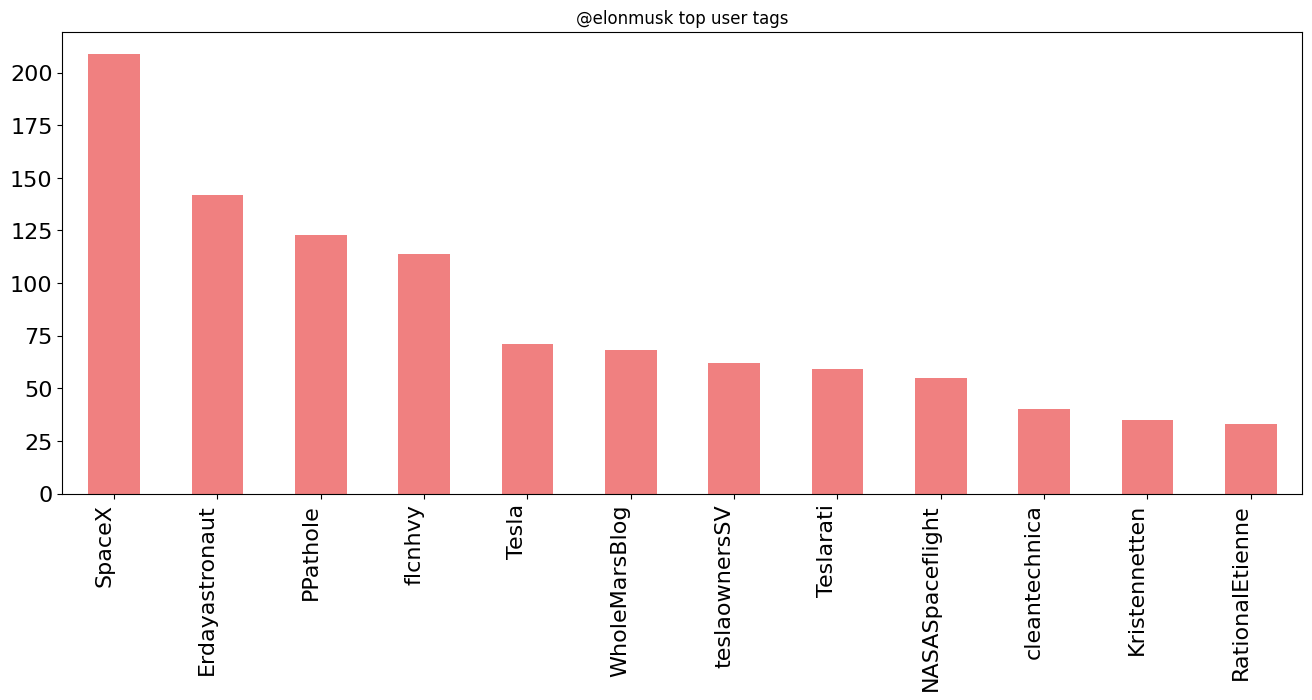

In [4]:
import itertools
tweets=data
c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(12).plot.bar(figsize=(16, 6), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=12)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [5]:
# call and checking particular cell  (RT change check)
data.at[84, 'Text']

'@Erdayastronaut @SpaceX It was foolish of us not to start 3 engines &amp; immediately shut down 1, as 2 are needed to land'

## Cleaning the text by removing irrelevant information

In [6]:
# function for Cleaning Text
import re     #Regular expressions, are a powerful tool for pattern matching and manipulation of strings
import string

def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))       # to match and replace any string that starts with '@' followed by alphanumeric characters
    text=re.sub('#','',str(text))       # removes hashtags
    # text=re.sub('RT[\s]+','',str(text))     #removes retweet indicators. It looks for the characters 'RT' followed by one or more whitespace characters 
    text = re.sub('^RT[\s]+', '', str(text))    #remove 'RT' at the beginning of the string
    text=re.sub('\n\n','',str(text))   # removes consecutive newline characters by replacing them with an empty string
    text=text.lower()       #  converts the entire text to lowercase
    text=re.sub('https?:\/\/\S+','',str(text))    # removes URLs from the text
    text=text.translate(str.maketrans('', '', string.punctuation))  # replaces each punctuation character with None
    text = re.sub("[0-9" "]+"," ",text)

    return text

data_filtered=data.copy()
data_filtered['Text']=data_filtered["Text"].apply(clean_text)
data_filtered

,Text
1,im an alien
2,aacarmack ray tracing on cyberpunk with hdr is...
3,great interview
4,doge is underestimated
5,congratulations tesla china for amazing execu...
...,...
1995,true it sounds so surreal but the negative pr...
1996,make sure to read ur terms amp conditions bef...
1997,samwise gamgee
1998,altho dumb and dumber is u f u f


In [7]:
freq = pd.Series(' '.join(data_filtered['Text']).split()).value_counts()[:10] # for top 10
print(freq)

the    486
to     400
a      380
is     355
of     315
u      258
f      242
in     219
amp    218
for    194
Name: count, dtype: int64


In [8]:
# call and checking particular cell  (RT change check)
data_filtered.at[84, 'Text']

'  it was foolish of us not to start   engines amp immediately shut down   as   are needed to land'

### Stopwords

In [9]:
# create a list of stop words from a text file
with open (r"stop.txt","r") as sw:
    stop_words=sw.read()
stop_words=stop_words.split('\n')

print(stop_words)

# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

### Filtering Stopwords

In [10]:
# Filtering out stop words from the list of tokenized words
from nltk.tokenize import word_tokenize

# Function to remove stop words from a sentence
def remove_stopwords(sentence):
    # stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

# Apply the function to each row in the 'tweets' column
data_filtered['tweets_no_sw'] = data_filtered['Text'].apply(remove_stopwords)

# Display the DataFrame
data_filtered


,Text,tweets_no_sw
1,im an alien,im alien
2,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel
3,great interview,great interview
4,doge is underestimated,doge underestimated
5,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...
...,...,...
1995,true it sounds so surreal but the negative pr...,true sounds surreal negative propaganda amp ea...
1996,make sure to read ur terms amp conditions bef...,make read ur terms amp conditions clicking accept
1997,samwise gamgee,samwise gamgee
1998,altho dumb and dumber is u f u f,altho dumb dumber


Word Frequency after Removal of Stopwords

In [11]:
tweets_no_sw=data_filtered['tweets_no_sw']
freq_stp = pd.Series(' '.join(tweets_no_sw).split()).value_counts()[:10] # for top 20
freq_stp

amp       218
tesla      96
great      76
its       56
haha       55
good       51
launch     49
yeah       41
sn         38
true       35
Name: count, dtype: int64

## matrix of TF-IDF features. 

Convert a collection of the preprocessed tweets to a matrix of TF-IDF features. 
Each row in the matrix corresponds to a tweet, 

and each column corresponds to a unique word in the entire collection.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf=tf.fit_transform(tweets_no_sw)
print(text_tf.shape)

dense=text_tf.todense()
denselist=dense.tolist()
feature_names=tf.get_feature_names_out()
print(feature_names[130:150],'\n')
df=pd.DataFrame(denselist,columns=feature_names)
print(df.iloc[:,141:149])
df

(1999, 3583)
['and' 'andrej' 'angle' 'anne' 'annihila' 'announcing' 'annoying' 'anode'
 'answer' 'antenna' 'antibody' 'anytime' 'aok' 'apogee' 'apologists' 'app'
 'appealing' 'appearing' 'appears' 'apple'] 

      anytime  aok  apogee  apologists  app  appealing  appearing  appears
0         0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
1         0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
2         0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
3         0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
4         0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
...       ...  ...     ...         ...  ...        ...        ...      ...
1994      0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
1995      0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
1996      0.0  0.0     0.0         0.0  0.0        0.0        0.0      0.0
1997      0.0  0.0     0.0         0.0  0.

,aacarmack,ab,aber,abo,aboard,abort,absence,absolute,absolutely,absorb,...,zealand,zenit,zeroes,zeros,zimon,zip,zon,zone,zpalmer,ðogecoin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.288594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating a Worlcloud

In [13]:
wordslist=" ".join(df)
print(wordslist)

wordslist_words=wordslist.split(' ')
print(len(wordslist_words))
print(wordslist_words)

aacarmack ab aber abo aboard abort absence absolute absolutely absorb absorption absurd absurdly ac academia accel accelera accelerate accelerated accelerating acceleration accelerator accept acceptable accepted access accessible accidental accidents accommodating account accura accuracy accurate ace achieve achieved achievement achieving achy acquisition action active activity actual actuall actuaries adagio add added addicted adding additive addressed administered adri adults advanc advance advanced advantage adventure advertising advice advised aero af afb affair affects affordable africa afshari afternoon age ages ago agony agree agreed ah ahead ahem ai aiautopilot aim aiming air aircraft airplane airplanes ak aka alarms alert alexander algo algorithm algorithms alien aliens aligned all allocati allocation allowed allowing alloy aloha alpha altho altit altitude alto aluminum am amaze amazing amazon america american amount amounts amp amplification amplitudes analog analysis anasisi

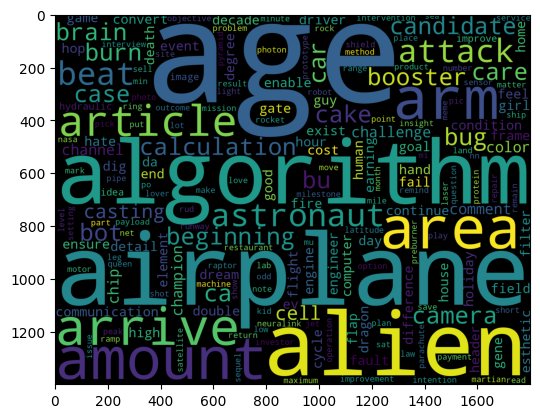

In [14]:
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='black',width=1800,height=1400).generate(wordslist)
plt.imshow(wordcloud)
plt.show()

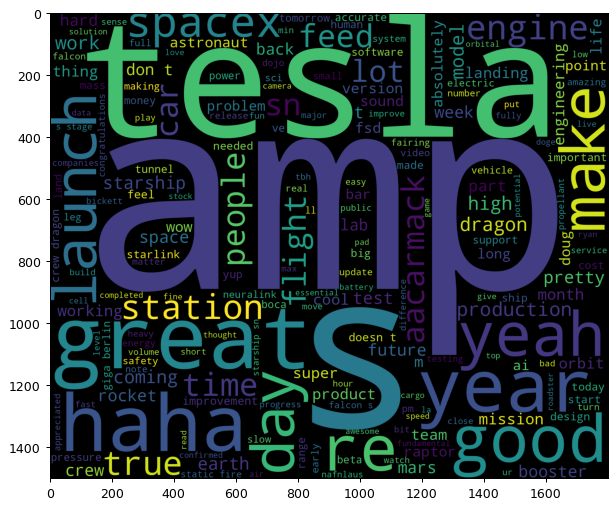

In [15]:
string_Total = " ".join(data_filtered['tweets_no_sw'])     # 'tweets_no_sw',  "Text"
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(8,8),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

# Posative & Negative words

In [16]:
with open(r"positive-words.txt","r") as pos:
    positive=pos.read().split("\n")
positive_words=positive[35:]

print(positive_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [17]:
with open (r"negative-words.txt","r") as neg:
    negative=neg.read().split("\n")
negative_words=negative[35:]  

print(negative_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

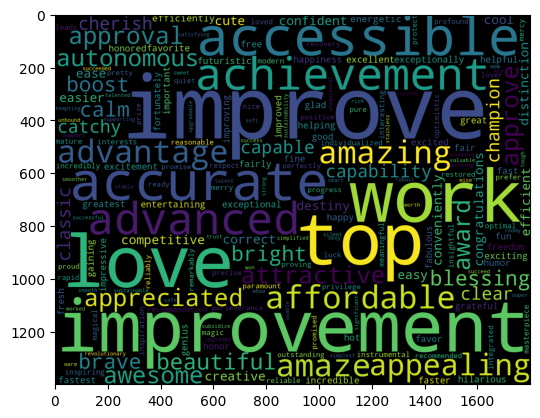

In [18]:
positive_tweet=" ".join([word for word in df if word in positive_words])
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(positive_tweet)
plt.imshow(pos_wordcloud)
plt.show()

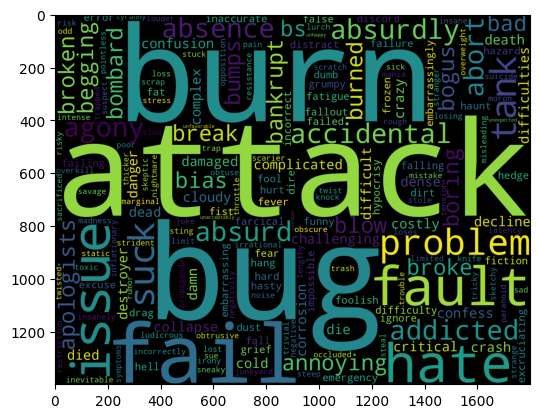

In [19]:
negative_tweets=" ".join([word for word in df if word in negative_words])
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(negative_tweets)
plt.imshow(neg_wordcloud)
plt.show()

# Sentimental analysis

In [20]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

data_filtered_SA=data_filtered.copy()
data_filtered_SA[["subjectivity", "polarity"]] = data_filtered_SA.apply(sentiment_analysis, axis=1)
data_filtered_SA

,Text,tweets_no_sw,subjectivity,polarity
1,im an alien,im alien,0.750000,-0.250000
2,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel,0.000000,0.000000
3,great interview,great interview,0.750000,0.800000
4,doge is underestimated,doge underestimated,0.000000,0.000000
5,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...,0.366667,0.275000
...,...,...,...,...
1995,true it sounds so surreal but the negative pr...,true sounds surreal negative propaganda amp ea...,0.508333,0.111111
1996,make sure to read ur terms amp conditions bef...,make read ur terms amp conditions clicking accept,0.888889,0.500000
1997,samwise gamgee,samwise gamgee,0.000000,0.000000
1998,altho dumb and dumber is u f u f,altho dumb dumber,0.500000,-0.375000


In [21]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data_filtered_SA["analysis"] = data_filtered_SA["polarity"].apply(analysis)
data_filtered_SA

,Text,tweets_no_sw,subjectivity,polarity,analysis
1,im an alien,im alien,0.750000,-0.250000,Negative
2,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel,0.000000,0.000000,Neutral
3,great interview,great interview,0.750000,0.800000,Positive
4,doge is underestimated,doge underestimated,0.000000,0.000000,Neutral
5,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...,0.366667,0.275000,Positive
...,...,...,...,...,...
1995,true it sounds so surreal but the negative pr...,true sounds surreal negative propaganda amp ea...,0.508333,0.111111,Positive
1996,make sure to read ur terms amp conditions bef...,make read ur terms amp conditions clicking accept,0.888889,0.500000,Positive
1997,samwise gamgee,samwise gamgee,0.000000,0.000000,Neutral
1998,altho dumb and dumber is u f u f,altho dumb dumber,0.500000,-0.375000,Negative


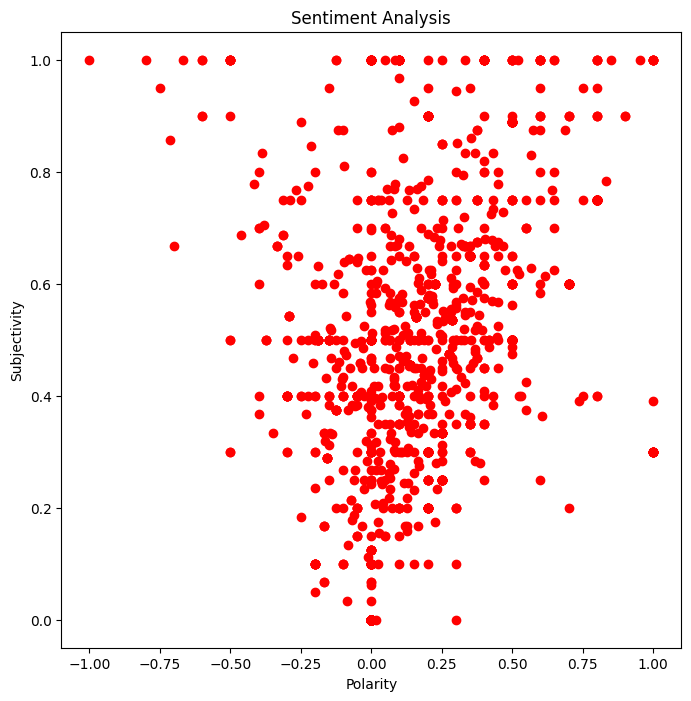

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(data_filtered_SA["polarity"], data_filtered_SA["subjectivity"], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [23]:
data_filtered_SA["analysis"].value_counts()

analysis
Neutral     891
Positive    881
Negative    227
Name: count, dtype: int64

In [24]:
#positive tweets
((891+881)/1999)*100

88.64432216108054

In [25]:
#negative tweets
(227/1999)*100

11.35567783891946

Finally, we can say that Elon Musk is an optimistic person because that ratio is positive and quite high.